# Lab 2 - Task 1 Vehicles with over 100K Kilometers/Task 2 Body Type.
IN this lab we will be using a dataset found on Kaggle.com about vehcile advertisements in the Czech republic and Germany.  For task 1 we will be focusing on predicting if a vehicle has over 100K kilometers. For task 2 we will be focusing on predicting the different body types of the vehicles.

    Scott Gozdzialski
    Adam Baca
    Zoheb Allam
    Ethan Graham
    
    The data can be found https://www.kaggle.com/mirosval/personal-cars-classifieds

##  Data Preparation Part 1 

There are roughly 3.5 Million rows and the following columns:

- maker - The manufacturer of the vehicle
- model - The distinct model of the vehicle
- mileage - in KM (our Response variable)
- manufacture_year
- engine_displacement - in cc
- engine_power - in kW
- body_type - Coupe, van, sedan, etc.
- color_slug - main color of the vehicle
- stk_year - year of the last emission control
- transmission - automatic or manual
- door_count
- seat_count
- fuel_type - gasoline, diesel, cng, lpg, electric
- date_created - when the ad was scraped
- date_last_seen - when the ad was last seen. Our policy was to remove all ads older than 60 days
- price_eur - list price converted to EUR

The first step is to download the data.

In [5]:
#Import the file of 3.5 Million records we will parse it down to 81000 usable records
import pandas as pd
import numpy as np
from __future__ import print_function
path = "~\\Desktop\\Cars.csv"

df = pd.read_csv(path,sep = ",")

C:\Users\adamg_000\Anaconda3\envs\ipykernel_py2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First we are going to have to clean the data.  As can be seen below most of the data is object type wich will not work for our classification models.

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
maker                  object
model                  object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type              object
color_slug             object
stk_year               object
transmission           object
door_count             object
seat_count             object
fuel_type              object
date_created           object
date_last_seen         object
price_eur              float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


First, we change the date the ad was created and the date it was removed to a interger of the number of days the ad ran. then we drop the columns we will not be using. Stk-year is very close to model year, model takes up to much memory seperate and is unworkable.  Finally we will drop all the rows with NAs.  With 3.5 rows we have plenty to use after removing them.

In [6]:
#Convert the date varibles into a delta between and type int
df.date_created = pd.to_datetime(df['date_created'])
df.date_last_seen = pd.to_datetime(df['date_last_seen'])
df['total_days'] = df['date_last_seen'] - df['date_created']
df.total_days = df['total_days'].dt.days.astype(int)

df.drop(['stk_year','model','date_created','date_last_seen'], axis=1, inplace=True)

df = df.dropna()

Next, we convert door count and seat count to ints, and remove eronious information.  There are no vehicles with a 10cc engine.

In [7]:
df.door_count = df.door_count.replace('None','0')
df.door_count = df.door_count.astype(int)
df.seat_count = df.door_count.replace('None','0')
df.seat_count = df.door_count.astype(int)

df = df.sort_values('engine_displacement', ascending=False)
df = df[:82088]

df = df.sort_values('engine_power', ascending=False)
df = df[:81500]

#### Task 1
This is where the dataframe for task one and task two deviate from each other.  Task one will one hot encode body type to predict milage.

Then, we OneHotEncode maker, body type,color slug, and fuel type. We turn Transmision to binary (1,0) variable. Finally we remove the columns that we OneHotEncoded.  We also make a back up dataframe incase we make a mistake we can go backto this point without rerunning everything above.

In [8]:
df2 = df

tmp_df = pd.get_dummies(df.maker,prefix='Maker')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.body_type,prefix='Body type')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.color_slug,prefix='Color')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.fuel_type,prefix='Fuel')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

df['manual'] = df.transmission=='man' 
df.manual = df.manual.astype(np.int)

df.drop(['body_type','color_slug','fuel_type','maker','transmission'], axis= 1, inplace = True)

In [238]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81500 entries, 3215366 to 3153910
Data columns (total 83 columns):
mileage                   81500 non-null float64
manufacture_year          81500 non-null float64
engine_displacement       81500 non-null float64
engine_power              81500 non-null float64
door_count                81500 non-null int32
seat_count                81500 non-null int32
price_eur                 81500 non-null float64
total_days                81500 non-null int32
Maker_alfa-romeo          81500 non-null uint8
Maker_aston-martin        81500 non-null uint8
Maker_audi                81500 non-null uint8
Maker_bentley             81500 non-null uint8
Maker_bmw                 81500 non-null uint8
Maker_chevrolet           81500 non-null uint8
Maker_chrysler            81500 non-null uint8
Maker_citroen             81500 non-null uint8
Maker_dacia               81500 non-null uint8
Maker_dodge               81500 non-null uint8
Maker_fiat                8

Changing mileage to a binary of milage over 100K Kilometers.

In [9]:
df['mileage_100K'] = df['mileage'] > 100000

# we want to predict the X and y data as follows:

y = df['mileage_100K'].values # get the labels we want
del df['mileage_100K'] 
del df['mileage']# get rid of the class label
X = df.values # use everything else to predict!

####  Task 2
For task 2 we will be predicting the body type and leaving mileage as a consistant number.

In [10]:
tmp_df = pd.get_dummies(df2.maker,prefix='Maker')
df2 = pd.concat((df2,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df2.color_slug,prefix='Color')
df2 = pd.concat((df2,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df2.fuel_type,prefix='Fuel')
df2 = pd.concat((df2,tmp_df),axis=1) # add back into the dataframe

df2['manual'] = df2.transmission=='man' 
df2.manual = df2.manual.astype(np.int)

df2.drop(['color_slug','fuel_type','maker','transmission'], axis= 1, inplace = True)
    

In [11]:
y2 = df2['body_type'].values # get the labels we want
del df2['body_type'] 
X2 = df2.values

## Data Preparation part 2 - Final dataset.
The final dataset constists of 81500 records with 82 columns.

First we downloaded our dataset of car sales in the Czech Republic and Germany.  Most of it downloads as obect type so we changed door count and seat count to intergers.  

We calculated the difference between when the advertisment started and was dropped and created a new variable of total days the ad ran.    

We dropped the stk-year and model, stk-year is not needed since it is very similar to model year.  Model has to many classifications in the rows for us to be able to seperate it out.  When we tried we ran out of memory.

#### Task 1

Speaking of seperation the classifactions out, we spereated out Maker, Body type, Color, and Fuel type with one hot endoing. 

#### Task 2

For the seperations in task 2, we seperated out Maker, Color, and Fuel Type with one hot encoding.  We left body type in the dataframe because this will now be our response variable.  Body type has 9 different classifaction we will be focusing on predicting.

#### Both tasks
We also, dropped any row with a NA value.  This was done for two reasons, first it removed useless rows that will mess with our classifiaction models, second since we started with 3.5M records dropping the rows with NAs left us with 81500 rows of usable data.  The entire 3.5M records would eat up the resources of our machines and 81500 records should be a large enough sampleset to properly capture the nature of the data.

## Model and Evaluation 1 - Evaluation Metric.

To evaluate our different classification methods, we will be examining the accuracy with which they can predict vehicles with over 100k miles (task 1) and vehicle body type (task 2). The accuracy of each method will tell us the percentage of our sample correctly classified (PCC), in otherwords the percent of true positives and true negatives. PCC is the most commonly used metric to assess overall model accuracy and is calculated without taking into account what kind of errors are made, meaning each error has the same weight. Since our models aim to predict features in cars and not something related to health care like cancer, we are not concerned about the different impacts the false positives and false negatives may have on our sample and therefore can be treated equally.        

## Model and Evaluation 2 - dividing data

We will be using 10 fold cross validation in order to divide our data into training and testing splits. Cross validation is when you divide a sample of data into subsets and then perform the analysis on a training subset and validate those results with the testing subset. Cross validation allows you to determine if the results of the model will generalize to an independent dataset and also can limit issues like overfitting. 

With 10 fold cross validation, the cross validation process is repeated 10 times with each of the subsamples being used only once for validation. The main advantages to repeating this process 10 times is that all observations are used for both training and validation and therefore we do not lose sample size which can affect modeling capabilities. 

In order to aggregate the results from the 10 fold cross validation we will take the PCC for each model and average it together to form an overall accuracy measure. This will enable us to get a more accurate estimate of each models performance.  

In [12]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)

## Model and Evaluation 3 - Model selection

This is the section where we run different models and evaluate the results.  Each model will be run more than once with different settings.  

For task 1 (mileage) we will  run a random forest, a k nearest neighbors, and a logistic regression. 

For task 2  (body type) we will run a random forest, a k nearest neightbors, and adaboost ensemble.

When we are done.  We will place the models that run the best of each type, for a total of 6, together for further analysis.

In [13]:
from sklearn import model_selection
from sklearn import metrics as mt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Random Forest - task 1 (mileage)

Starting with a randdom forest with 50 classifers as a baseline

Looks good, trying 10 estimators

10 did worse, so trying 100 to see if there is an improvement

There seems to be no difference between 50 and 100 estimators.  Will use 50 estimators and adjust the max depth.  Starting at 10


Max depth of ten is an imporvement.  Will continue to adjust the max depth.  Trying 5.

Max depth 5 is an increase of accuracy mena and a reduction of standard deviation.

Max depth of 3 decreases the mean accuracy and increases the standard deviation.  

We will stick with number of estimators at 50 and tree depth of 5 for mileage.

### Random Forest - task 2 (Body type)

Starting with a randdom forest with 50 classifers as a baseline

Almost no difference when adjusting number of estimators.  Moving on to max depth.  Starting with a max depth of 10

Adjusting the max depth seems to make the model worse.  Will try a depth of 5 to see if there is any improvement.

Adjusting the max depth makes the randomforest worse for the classification of body type.  We will stick to having the computer pick the max depth. 

The best random forest for body type is 100 estimators and the computer picking the depth,

### K Nearest Neighbors - Task 1 (Mileage)

We will test 1,3,5, and 7 neighbors

Starting with 1

Knn of 1 has ok results will try 3 neighbors next.

3 neightbors has an increase in mean average, but the standard deviation has not changed.

There is almost no difference between 3 and 5 neighbors.  We will try 7 neighbors to see what happens, my guess before we run 7 neighbors is that the model will have a slight decrease in accuracy.

Surprisingly the KNN with 7 neighbors has the best mean accuracy and the standard deviation is almost exactly the same.

The best KNN model for mileage is 7 neighbors.

### K Nearest Neightbors Task 2 ( Body Type)

We will test 1,3,5, and 7 neighbors

Staring with 1

1 neighbor does not seem that srtong, so we will adjust to 3 neighbors.

3 neighbors has a greater accuacy mean, but has a greatere standard deviation.  Next is 5.

With a l1 penalty there is an increase in mean accuarcy and no change in standard deviation. 

### Adaboost - task 2 only (Body type)

For the final model of task 2 we will using Adaboost.  We will be adjust the n_estimators starting at 50 and trying 100 afterwards.  Then we will tray changing the learning rate.  The default learning rate is 1.  We will pick the best number of estimators and also try 1.5 and 2.

The results are exactly the same based upon the number of estimators bewteen 50 and 100.  we will try dropping it to 25.

25 dropped the accuracy a little but there is not much to give so we will stick with 50 for the next step.

Now we will adjust the learning rate from 1 (default) to 1.5 and 2.0.

That was a huge inprovement in predictablity from 395 to 46%. The standard deviation also improved.  

Now to try learning_rate of 2.0.

Increasing the learning rate to 2.0 has dropped the accuracy so we will stick with 50 estimators nad a learning rate of 1.5.

##### So here is the best models for each task and model type.

*******************************************************

Random Forest - 50 estimators with a max depth of 5

For task 1

KNN - neighbors 7

Logisitc Regression - l1 penalty

*******************************************************
For task 2

random Forest - 100 estimators with the computer picking the depth

KNN - neighbors 7

Adaboost - 50 estimators and a learning rate of 1.5

In [14]:
#*************************************Task 2 Random Forest
rf1clf = RandomForestClassifier(n_estimators=50,max_depth=5,random_state=1)
iter_num = 0
rf_acc = np.zeros(10)

for train_indices, test_indices in cv.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    rf1clf.fit(X_train,y_train) 
    rf_y_hat = rf1clf.predict(X_test)
    rf_acc[iter_num] = mt.accuracy_score(y_test,rf_y_hat)
    iter_num+=1
    
    
print ("Taks 1 Random Forest Average accuracy = ", rf_acc.mean()*100, "+-", rf_acc.std()*100)


Taks 1 Random Forest Average accuracy =  82.5938414714 +- 4.3882407008


In [15]:

#************************************Task 2 Random forest
rf2clf = RandomForestClassifier(n_estimators=100,random_state=1)
iter_num = 0
rf_acc2 = np.zeros(10)

for train_indices, test_indices in cv.split(X,y): 
    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    rf2clf.fit(X2_train,y2_train) 
    rf_y_hat2 = rf2clf.predict(X2_test)
    rf_acc2[iter_num] = mt.accuracy_score(y2_test,rf_y_hat2)
    iter_num+=1
    
    
print ("Task 2 Random Forest Average accuracy = ", rf_acc2.mean()*100, "+-", rf_acc2.std()*100)

Task 2 Random Forest Average accuracy =  60.7290201268 +- 4.04250739374


In [17]:


#************************************Taks 1 KNN
k1clf = KNeighborsClassifier(n_neighbors=7)
iter_num = 0
knn_acc= np.zeros(10)

for train_indices, test_indices in cv.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    k1clf.fit(X_train,y_train) 
    knn_y_hat = k1clf.predict(X_test)
    knn_acc[iter_num] = mt.accuracy_score(y_test,knn_y_hat)
    iter_num+=1
    
print ("Task 1 KNN Average accuracy = ", knn_acc.mean()*100, "+-", knn_acc.std()*100)


Task 1 KNN Average accuracy =  70.5669734799 +- 6.137614028


In [18]:

#************************************Task 2 KNN
k2clf = KNeighborsClassifier(n_neighbors=7)
iter_num = 0
knn_acc2= np.zeros(10)

for train_indices, test_indices in cv.split(X,y): 
    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    k2clf.fit(X2_train,y2_train) 
    knn_y_hat2 = k2clf.predict(X2_test)
    knn_acc2[iter_num] = mt.accuracy_score(y2_test,knn_y_hat2)
    iter_num+=1
    
print ("taks 2 KNN Average accuracy = ", knn_acc2.mean()*100, "+-", knn_acc2.std()*100)


taks 2 KNN Average accuracy =  40.8534214097 +- 7.43449492779


In [19]:




#************************************* task 1 logistic regression
lrclf = LogisticRegression(penalty ='l1') 
iter_num = 0
lr_acc= np.zeros(10)

for train_indices, test_indices in cv.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    lrclf.fit(X_train,y_train) 
    lr_y_hat = lrclf.predict(X_test)
    lr_acc[iter_num] = mt.accuracy_score(y_test,lr_y_hat)
    
    iter_num+=1
    
print ("Task 1 Logistic Regression Average accuracy = ", lr_acc.mean()*100, "+-", lr_acc.std()*100)


Task 1 Logistic Regression Average accuracy =  78.3521680502 +- 4.75222440953


In [20]:


#*************************************Task 2 adaboost
iter_num = 0
ad_acc= np.zeros(10)

iter_num = 0

for train_indices, test_indices in cv.split(X,y):
    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    kfold = model_selection.KFold(n_splits=10, random_state=True)
    clf = AdaBoostClassifier(n_estimators= 50,learning_rate = 1.5, random_state=True)
    clf.fit(X2_train,y2_train) 
    ad_y2_hat = clf.predict(X2_test)
    ad_acc[iter_num] = mt.accuracy_score(y2_test,ad_y2_hat)
    
    iter_num+=1
    
print ("Task 2 Adaboost Average accuracy = ", ad_acc.mean()*100, "+-", ad_acc.std()*100)

Task 2 Adaboost Average accuracy =  44.2242203473 +- 10.3220341884


## Modeling and Evaluation 4 - Analyze Results

The most accurate model for task 1 was the Random Forest Classifier 82.59 +/- 4.39 with Linear Regression being a close 2nd with 78.35 +/- 4.75 Random Forest Classifier was also the top performing model for task 2 with 60.73 +/- 4.04. The Random Forest Classifier method has proven to be a solid model for our dataset. The results are quite interesting when we use our personal experience from purchasing used cars. We will explain in detail but first, here is a visualization to help wrap your head around the models.

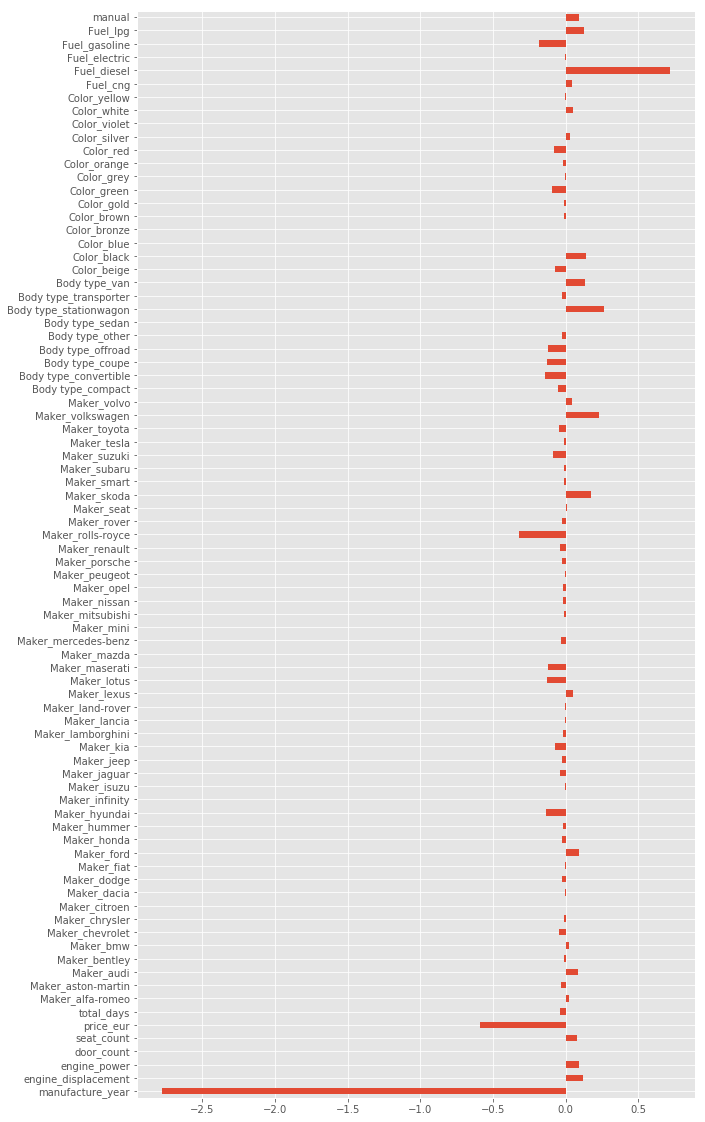

In [44]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) #

# train the model just as before
lrclf = LogisticRegression(penalty='l1') 
lrclf.fit(X_train_scaled,y_train) 
lr_y_hat = lrclf.predict(X_test_scaled) # get test set precitions

# sort these attributes and spit them out
zip_vars = zip(lrclf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)

# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10,20))
weights = pd.Series(lrclf.coef_[0],index=df.columns)
weights.plot(kind='barh')
plt.show()

## Random Forest Classifier Feature Importances

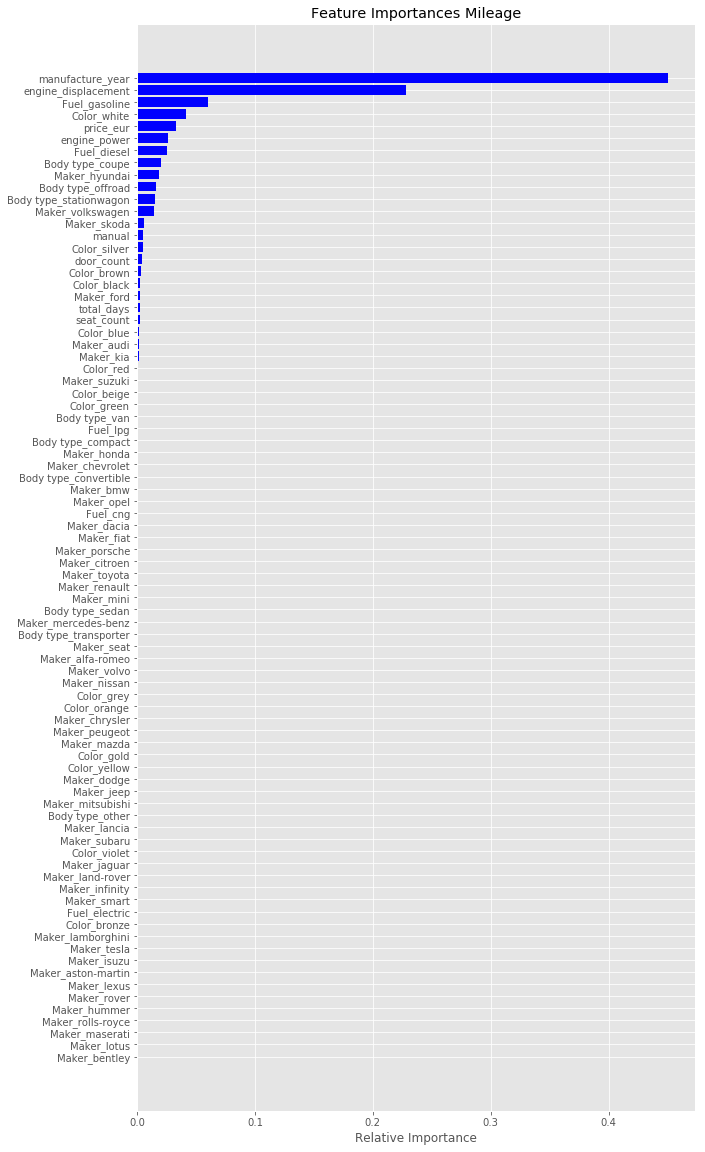

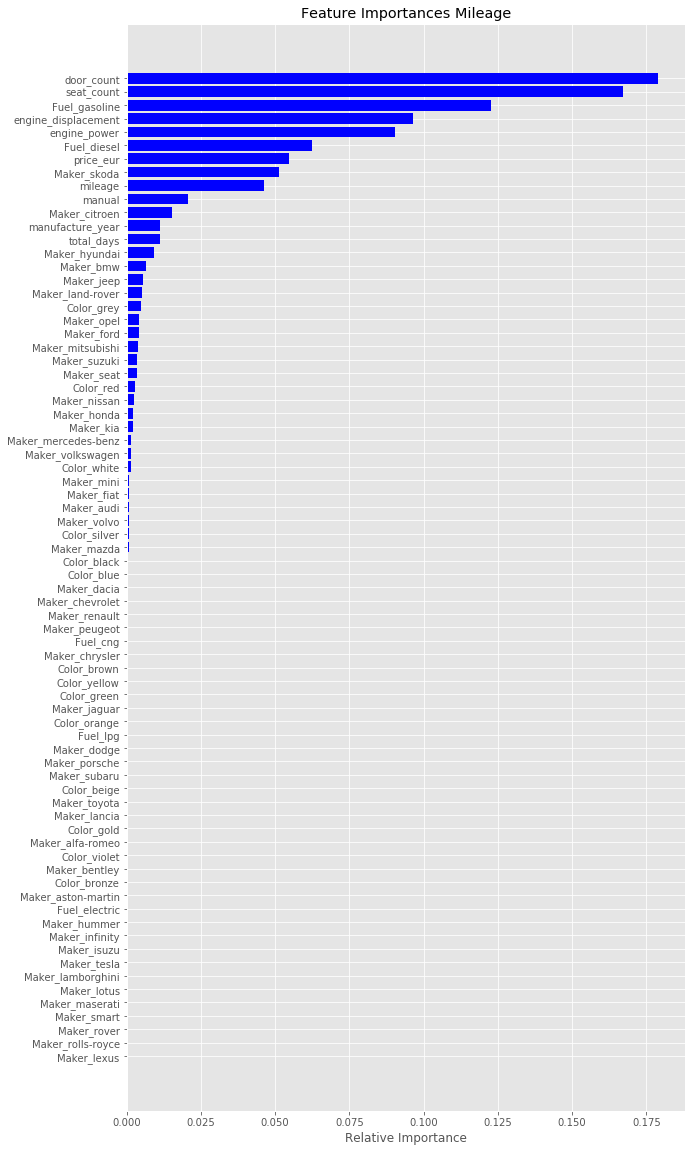

In [40]:
##rf Task 1
rf1clf = RandomForestClassifier(n_estimators=50,max_depth=5,random_state=1)
rf1clf.fit(X_train_scaled,y_train) 
rf1_y_hat = rf1clf.predict(X_test) # get test set precitions
names = df.columns


names = df.columns
importances = rf1clf.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(10,20))
plt.title('Feature Importances Mileage')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), names[indices]) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

##Rf task 2

rf2clf = RandomForestClassifier(n_estimators=50,max_depth=5,random_state=1)
rf2clf.fit(X2_train,y2_train) 
rf2_y_hat = rf2clf.predict(X2_test) # get test set precitions
names = df2.columns

names2 = df2.columns
importances2 = rf2clf.feature_importances_
indices2 = np.argsort(importances2)


plt.figure(figsize=(10,20))
plt.title('Feature Importances Mileage')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), names2[indices2]) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

### Task 1 - Mileage (kilometers)
If we look at the chart, the most important features to predict mileage are:
Manufacture Year: This one is a pretty obvious feature of importance when considering a vehicle's mileage. The older the car, the longer the vehicle has the oportunity to be used. There are some exceptions but this rings true and it is good to see manufacture year top the list because it tell us that we are on the right track.

Engine Displacement: Engine displacement, especially in Europe, can be an important feature for predicting mileage because high fuel prices will cause an inverse relationship with engine size. Cars with larger engine will likely be up for resale with fewer kilometers as a result of climbing fuel prices and a previous owner's consciousness of fuel efficiency.

Fuel Type-Gasoline: Diesel engines are popular in Europe so how would knowing the fuel type assist us in predicting the mileage on a car listed for sale? Well, diesel's popularity does not result from it's cleanliness but there are some opinions on the durability of a diesel engine and the fuel usage. Diesel engine can have much longer life spans which is appealing in the market so it would not be surprising that we could potentially predict the mileage of a vehicle depending on the type of fuel it uses.

Color: In my opinion, color is on the list as a coincidence and should be considered a confounding variable. White cars may be more popular but it would not be a fair statement to say that we can rationally link a car's color to the amount of kilometers it has.

Price in Euros: I would have expected price to be higher on our list but it does make sense that price in combination with some of the other features, such as manufacture year, would net the best results. Price by itself could lead to a poor forecast but with the year it can be quite revealing about the amount of kilometers a vehicle has.

The model for task 1, using Random Forest Classifiers, turned out to make sense and I would definitely use this model and feel confident in the results when applied to a dataset with cars for sale. With some additional data and tweaking this could be useful for negotiations when it comes to buying a car.

### Task 2 - Body Type
The top features in our data to predict the body type are:
Door Count: This one goes hand in hand with body type. A vehicle has 4 doors or more, it would likely be a larger vehicle but not always. The use of another feature to predict body type would be needed.

Seat Count: Similar to the amount of doors on a vehicle, seats are also an indicator of the body type. Depending on the definition of a seat, a 4 door car would have 3 seats or 5 if seats are defined in relation to capacity. SUV's and minivans can have up to 8 depending on the size. Seat count is a good feature to use for prediction.

Fuel Type-Gasoline: Fuel type could be used for prediction in combination with other features. Certain body styles are more commonly purchased with diesel engines such as full size trucks or certain 4 door sedans made by certain manufacturers such as Volkwagen and Audi.

Engine Displacement: Engine displacement is one of those that should have a direct relationship with body type. Engine displacement, power and body type typically all increase together. A bigger bigger body type will usually need to have a bigger engine to move the additional weight without compromising performance. 

Engine Power: As stated above, engine power and displacement usually have a direct relationship with body type. A bigger engine typically produces more power that is needed for a bigger vehicle.

Price in Euros: Bigger vehicles are typically prices higher than smaller ones. Add price to some of the important features in this model and prediction should become quite accurate. 

Random Forest Classifier was a good model choice for task 2 and the feature importances identified were appropriate for what we are trying to predict. Task 1 had a better model and accuracy but task 2 still performed well

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


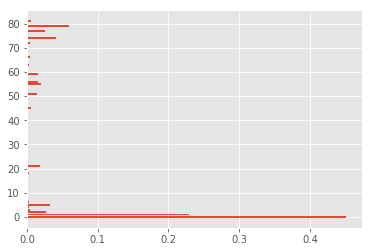

Generalization score estimate from training data 0.870223179593


In [42]:
print (rf1clf)

plt.barh(range(len(rf1clf.feature_importances_)), rf1clf.feature_importances_)
plt.show()

print ('Generalization score estimate from training data', clf.oob_score_)

## Modeling and Evaluation 5 - Model advantages

For the purposes of this section we will only be examining the advantages to the 6 final models that resulted in the best prediction accuracy. When we consider which model had the best accuracy for task 1 (vehicles with over 100k kilometers), our results indicate that random forest had the highest overall accuracy (82.59). An advantage of using random forest is that it runs efficiently on large databases, which can be seen in the time it took to run the model. Random forest took the shortest amount of time to produce prediction accuracy, making it the easiest model to work with. In addition, it is one of the most accurate algorithms for classification, which can be seen in the high accuracy compared to KNN (70.57) and logistic regression (78.38).

However, we can also see the Logistic regression was not far behind random forest in prediction accuracy. An advantage of logistic regression is that it can perform feature selection (we used l1 regularization). Another advantage is the output can be interpreted as probability which makes interpreting important attributes easier as demonstrated in the important attributes section of our lab. However, a major disadvantage of logistic regression was the time it took to run the model. 

Of the 3 models KNN had the lowest accuracy (70.57). Although we played around with different numbers of nearest neighbors (1,3,5, and 7), its possible that we did not select the most optimal number which is a disadvantage of KNN as you have to determine the value before running the analysis. 

Based on these results we can say that random forest was the best model for Task 1. 

For Task 2 we used random forest, KNN, and adaboost to predict a vehicles body type. Once again the model with the highest accuracy was random forest (60.64). While some of  the advantages of random forest and KNN are discussed above, adaboost was a new algorithm we decided to use for task 2. We chose it because it was simple to implement, it has good generalization capabilities, and assigns weights to determine probablity. The adaboost model was able to achieve a higher accuracy (46.01) than KNN (40.86). 

Based on the results we can say that random forest was the best model for Task 2. 

Since random forest produced the highest accuracy for both Task and 1 and 2 we concluded that it is the better classification task. 



## Modeling and Evaluation 6 - Important attributes

In [27]:
from matplotlib import pyplot as plt

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


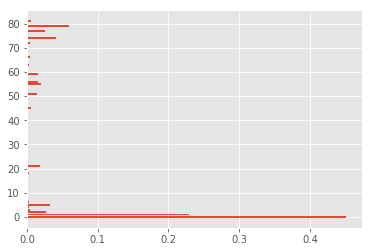

Generalization score estimate from training data 0.869364272178


In [47]:
print (rf1clf)

plt.barh(range(len(rf1clf.feature_importances_)), rf1clf.feature_importances_)
plt.show()

print ('Generalization score estimate from training data', clf.oob_score_)

In [49]:
from sklearn.preprocessing import StandardScaler



# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) #

# train the model just as before
lrclf = LogisticRegression(penalty='l1') 
lrclf.fit(X_train_scaled,y_train) 

lr_y_hat = lrclf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,lr_y_hat)
conf = mt.confusion_matrix(y_test,lr_y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lrclf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.758743404099
[[1317 1589]
 [ 377 4866]]
manufacture_year has weight of -2.77519719342
price_eur has weight of -0.589952781626
Maker_rolls-royce has weight of -0.318090242289
Fuel_gasoline has weight of -0.278357302488
Body type_convertible has weight of -0.136142068241
Maker_hyundai has weight of -0.130936553683
Maker_lotus has weight of -0.126564636792
Maker_maserati has weight of -0.121593005082
Body type_coupe has weight of -0.110570656164
Color_green has weight of -0.110293374473
Body type_offroad has weight of -0.108919385051
Color_red has weight of -0.101134493508
Color_beige has weight of -0.0855086839963
Maker_suzuki has weight of -0.0832712165894
Maker_kia has weight of -0.0709738467481
Body type_compact has weight of -0.0498413745786
Maker_chevrolet has weight of -0.0459169175068
Maker_toyota has weight of -0.0444620694723
total_days has weight of -0.041587672842
Maker_jaguar has weight of -0.0385168350939
Maker_aston-martin has weight of -0.0355274552439
Maker_re

In [53]:
abs_vars = abs(zip_vars)
#zip_vars = sorted(abs(zip_vars))

TypeError: bad operand type for abs(): 'list'

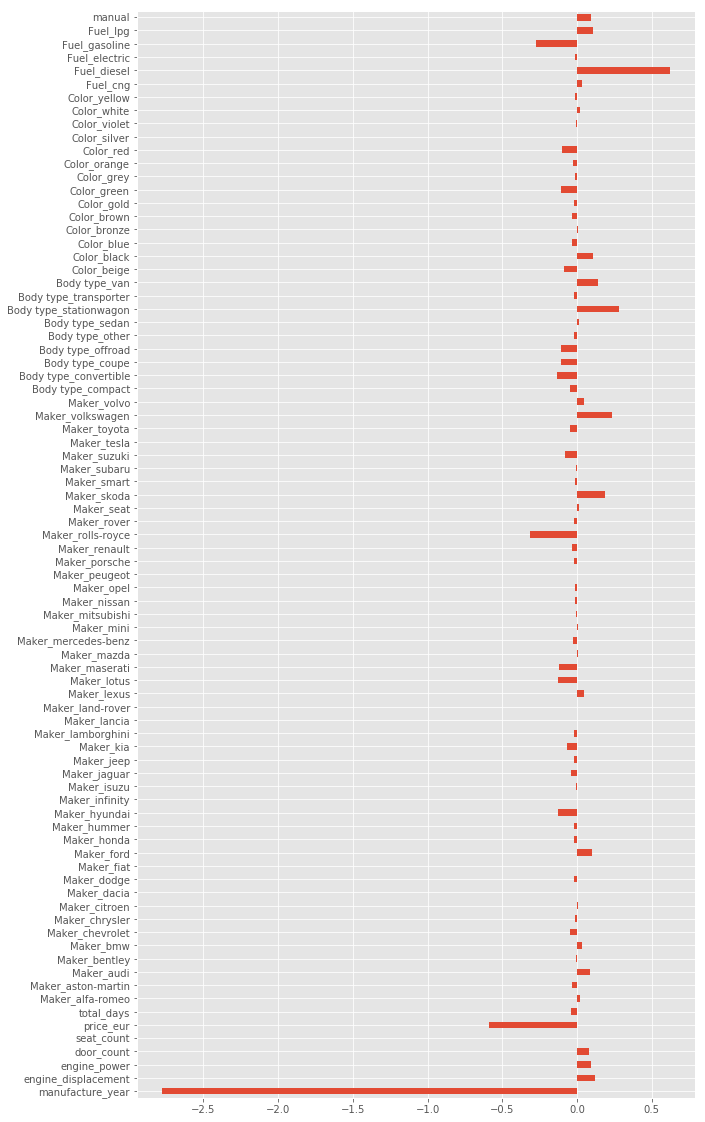

In [51]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10,20))
weights = pd.Series(lrclf.coef_[0],index=df.columns)
weights.plot(kind='barh')
plt.show()

## Deployment

While our model did not produce any groundbreaking results to the auto industry, we were able to shed light on some of the more important features car manufactures should consider when designing and selling their automobiles. In task 1 we showed that price was an important attribute when predicting if cars had over 100k, indicating that the cheaper the car the more likely it was to have over 100k miles. This could mean that the cheaper cars being purchase are being used as commuter cars and the more expensive cars are being preserved better due to their price tag. An automobile company could use this information to put greater emphasis on long lasting cars that come with cheaper price tags. 

In order to measure the value of our model, we could track the areas the companies make changes in and try to quantify if we see an improvement in those areas. For example, if a company were to use our model to impact sales, we could see if there was a statistically significant increase in sales after our model was put into use. If there is improvement then our model was beneficial to the company. One such area our model could impact is which body design should an automotive company manufacture more. 

Our model would have benefited from some additional attributes however such as sales for each model type. As cars are meant to be sold, it would have been good to know if certain models sold better than others and then modeled to see what attributes are the best predictor of sales. It would have also been interesting to know if the cars came with advanced safety features or GPS navigation so we could understand the impact those have on sales. 

Finally, our model would not need to be updated as frequently as changes to automobiles happens yearly when new models are released or old models are changed. Therefore, our model would need to be rerun once a year to keep in touch with the latest changes to the automobile industry.  




## Exceptional Work - Variable reduction using Variance Threshold.

For our exceptional work we will use variance threshold to reduce the number of variables and run it through a model on each dataset.  We will slowly increase the varaiance threshold dropping more and more varaible until we hit 50% variance.  We will use random forest model on both datasets since they have a strong result for both datasets.  The random froest will use 30% in 5% increments estimators and no max depth.


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold

In [32]:
dfnew = df
dfnew2 = df2

In [33]:
X=dfnew.values
X2 = dfnew2.values

In [34]:

#*************************************Task 2 Random Forest
clf = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=1)
acc = cross_val_score(clf,X,y=y,cv=cv)
print ("Task 1 Random Forest 0% Variance Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
print('shape is ',dfnew.shape)
#************************************Task 2 Random forest
clf = RandomForestClassifier(n_estimators=100, random_state=1)
acc = cross_val_score(clf,X2,y=y2,cv=cv)
print ("Task 2 Random Forest 0% Variance Average accuracy = ", acc.mean()*100, "+-", acc.std()*10)
print('shape is ',dfnew2.shape)
for i in range(1,7):
    #*************************************Variance threshold 
    VT = (i*5)/100
    percent = VT *100
    selector = VarianceThreshold(VT)
    selector.fit_transform(dfnew)
    idx = selector.get_support()
    dfnew = dfnew.loc[:,idx]
    X = dfnew.values
    #************************************************      
    selector = VarianceThreshold(VT)
    selector.fit_transform(dfnew2)
    idx = selector.get_support()
    dfnew2 = dfnew2.loc[:,idx]
    X2 = dfnew2.values
    #*************************************Task 2 Random Forest
    clf = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=1)
    acc = cross_val_score(clf,X,y=y,cv=cv)
    print ("Task 1 Random Forest ",percent,"% Variance Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
    print('shape is ',dfnew.shape)
    #************************************Task 2 Random forest
    clf = RandomForestClassifier(n_estimators=100, random_state=1)
    acc = cross_val_score(clf,X2,y=y2,cv=cv)
    print ("Task 2 Random Forest ",percent,"% Variance Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
    print('shape is ',dfnew2.shape)

Task 1 Random Forest 0% Variance Average accuracy =  82.5938414714 +- 4.3882407008
shape is  (81500, 82)
Task 2 Random Forest 0% Variance Average accuracy =  31.2548679862 +- 0.583592542284
shape is  (81500, 74)
Task 1 Random Forest  0 % Variance Average accuracy =  82.5938414714 +- 4.3882407008
shape is  (81500, 82)
Task 2 Random Forest  0 % Variance Average accuracy =  31.2548679862 +- 5.83592542284
shape is  (81500, 74)
Task 1 Random Forest  0 % Variance Average accuracy =  82.5938414714 +- 4.3882407008
shape is  (81500, 82)
Task 2 Random Forest  0 % Variance Average accuracy =  31.2548679862 +- 5.83592542284
shape is  (81500, 74)
Task 1 Random Forest  0 % Variance Average accuracy =  82.5938414714 +- 4.3882407008
shape is  (81500, 82)
Task 2 Random Forest  0 % Variance Average accuracy =  31.2548679862 +- 5.83592542284
shape is  (81500, 74)
Task 1 Random Forest  0 % Variance Average accuracy =  82.5938414714 +- 4.3882407008
shape is  (81500, 82)
Task 2 Random Forest  0 % Variance A

As can be seen above.  When we increase the limit of the threshold of the variance to the columns to drop we loss some of our accuracy.  Our first jump dropped the most features from the datset but we only lost 1% of hte accuracy in the fist task and 4% in the second task.

For task 1(mileage) we had a jump in accuracy when we dropped the variance to 20% which had only 10 features in that model. That would be the threshold I would pick for running the predictive model as it would still have a strong accuracy, 1% off from the full feature set, and would be less likely for overfitting.

For task 2 (body type) there is a steady decline in accuracy until you  hit 20% variance threshold.  At this point it seems that the data has hit a stable core of features.  I  would pick to run the full model for this predictive model.  Even though it is only a drop of 4% in accuracy for the first step, when the original model has only 28% every percentage point is important.